In [5]:
import os
_ROOT_PATH = os.path.join('..', '..', '..')
_OPTIM_DIR = os.path.join(_ROOT_PATH, 'experiments', 'optim')
_FINAL_DFS_DIR = os.path.join('..', '..', 'final_dfs')

import sys
sys.path.append('..')
sys.path.append(os.path.join('..', '..', '..', 'tools'))
import plotconfig

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

dbf = os.path.join(_FINAL_DFS_DIR, 'optim.parquet')
df = pd.read_parquet(dbf, engine='pyarrow')

<Axes: xlabel='number', ylabel='value'>

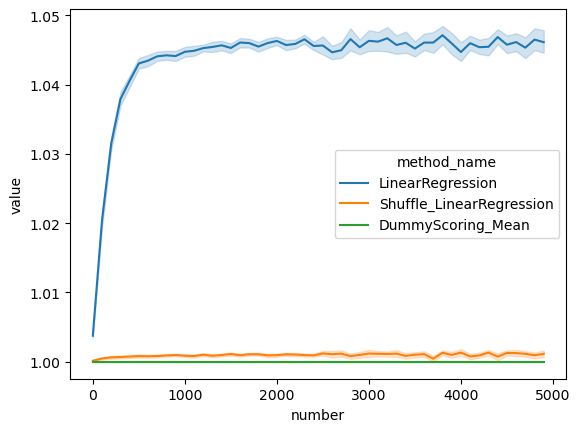

In [13]:

# Define the interval for subsampling
interval = 100
numbers_to_keep = list(range(0, df['number'].max() + 1, interval))
subsampled_df = df[df['number'].isin(numbers_to_keep)]

sns.lineplot(data=subsampled_df, x='number', y='value', hue='method_name')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


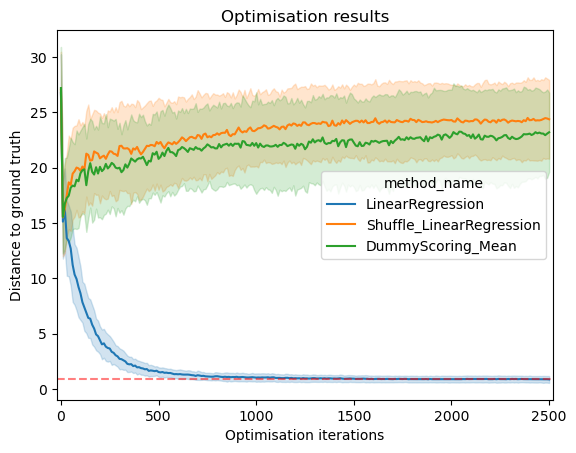

In [15]:
import seaborn as sns

# Define the interval for subsampling
interval = 10
numbers_to_keep = list(range(0, df['number'].max() + 1, interval))
subsampled_df = df[df['number'].isin(numbers_to_keep)]

mask = ((subsampled_df['number'] <= 2500))
subsampled_df = subsampled_df[mask]

ax = sns.lineplot(data=subsampled_df, x='number', y='euclidean_distance', hue='method_name', errorbar='sd')

mask = ((subsampled_df['method_name'] == 'LinearRegression') &
       (subsampled_df['number'] > 2400))
tmp = subsampled_df[mask]
ax.axhline(y=np.mean(tmp['euclidean_distance']), color='red', alpha=0.5, linestyle='--', label='Euclidean Top Rank (LinReg)')


plt.xlabel('Optimisation iterations')
plt.ylabel('Distance to ground truth')
plt.title('Optimisation results')

plt.xlim([-20, 2520])

# Save as high-definition
plotconfig.save_fig("optim")

In [165]:
distance.euclidean(target_face, pca_face.inverse_transform([-15]*10))

47.415840548808944

In [147]:
np.mean(tmp['euclidean_distance'])

0.9025817634664156

In [ ]:
import file_tools
import saving_tools
import face_tools

import numpy as np
face_tools.img_from_latent(np.array(d['best_face']))

target_data = np.load(d['target_filename'])
target_face = target_data['target_face']
face_tools.img_from_latent(target_face)

In [ ]:
from scipy.spatial import distance
import pickle

result_df = pd.DataFrame()

fs = file_tools.list_files(_OPTIM_DIR, "*.json")
for f in fs:
    d = saving_tools.load_dict_from_json(f)
    df_filename = os.path.join(_ROOT_PATH, d['df_filename'])

    df = pd.read_parquet(df_filename, engine='pyarrow')
    df['method_name'] = d['method_name']

    target_data = np.load(d['target_filename'])
    target_face = target_data['target_face']

    params_columns = ['params_x0', 'params_x1', 'params_x2', 'params_x3', 'params_x4', 
                  'params_x5', 'params_x6', 'params_x7', 'params_x8', 'params_x9']
    params_array = df[params_columns].to_numpy()

    pca_face_filename = os.path.join(_ROOT_PATH, d['pca_face_filename'])
    with open(pca_face_filename, 'rb') as file:
        pca_face = pickle.load(file)
    tested_faces = pca_face.inverse_transform(params_array)
    
    euclidean_distances = np.array([distance.euclidean(target_face, row) for row in tested_faces])
    df['euclidean_distance'] = euclidean_distances
    
    columns_to_keep = ['method_name', 'number', 'value', 'euclidean_distance']
    new_df = df[columns_to_keep]
    
    result_df = pd.concat([result_df, new_df], ignore_index=True)